In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [325]:
def compute_rank(M, i=7, x='ones', da = False):
    resM = []
    v = []
    d = 0.85
    shape = len(M)
    results = []
    if x == 'ones':
        v = np.ones(shape)
    elif x=='N':
        v = np.ones(shape)/8
    resM.append(v)
    if da:
        ONES = np.ones((shape, shape), dtype=np.float32)
        #M = (np.einsum('ji,i->j'), M, d)+ ((1-d)/shape)*(ONES)
       # print("Matrix with damping factor:")
        M_hat = (M*d) + (((1 - d) / shape) * ONES)
        results.append(M_hat)
        #print(M_hat)
        M = M_hat
   # epsilon = 0.000001
    index = i
    while index >= 0:
        #res = M.dot(v)
        res = np.einsum('ji,i->j', M, v)
        #res = np.inner(M, v)
        #print(res)
        resM.append(res)
        v = res
        index = index-1
    #print("PageRank result:")
    results.append(np.array2string(np.array(resM), precision = 4, separator=",", formatter={'float_kind':lambda x: "%.4f" % x}))
    results.append( resM[-1])
    return results
        
    

In [128]:
A = np.matrix([
    [0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,1,0],
    [1,0,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0]
]).T

In [129]:
G=nx.from_numpy_matrix(A)

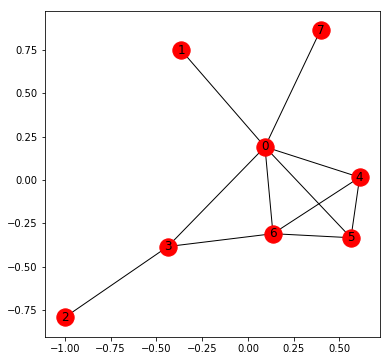

In [130]:
plt.figure(figsize=(6,6))
nx.draw_networkx(G)

In [131]:
D = nx.DiGraph(A)

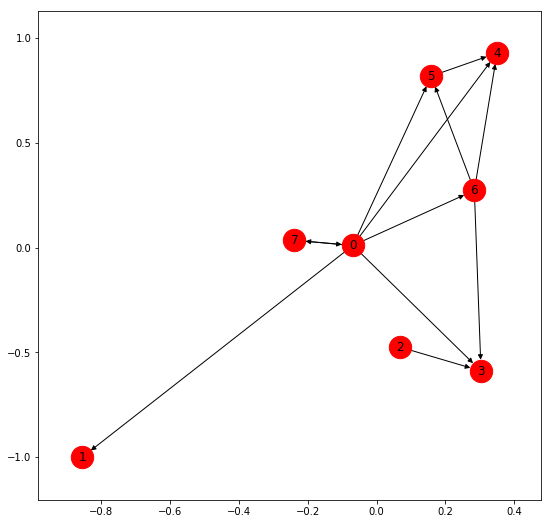

In [132]:
plt.figure(figsize=(9,9))
nx.draw_networkx(D,node_size = 500)

In [31]:
#Prima matrice della fonte
M = np.matrix([
    [0,0,0.5, 0.5],
    [0.333, 0, 0, 0],
    [0.333, 0,0,0.5],
    [0.333, 1,0.5,0]
    ])

In [32]:
v = np.ones(4)

In [33]:
res1 = M.dot(v)
res1

matrix([[1.   , 0.333, 0.833, 1.833]])

In [185]:
np.matlib.ones((len(M), len(M)))

matrix([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [314]:
print(compute_rank(M, i = 8)[0])
#print(compute_rank(M, i = 8)[0])

PageRank result:
[[1.0000,1.0000,1.0000,1.0000],
 [0.7875,0.6455,0.6455,1.9205],
 [0.8324,0.7810,0.7810,1.6041],
 [0.8227,0.7264,0.7264,1.7222],
 [0.8246,0.7488,0.7488,1.6750],
 [0.8240,0.7392,0.7392,1.6939],
 [0.8240,0.7431,0.7431,1.6856],
 [0.8238,0.7413,0.7413,1.6887],
 [0.8237,0.7418,0.7418,1.6869],
 [0.8235,0.7414,0.7414,1.6872]]


In [163]:
M2 = [
    [0,0,1,0.5],
    [0.333,0,0,0],
    [0.333,0.5,0,0.5],
    [0.333,0.5,0,0]
]

In [316]:
compute_rank(M2, i = 3580)[1]

PageRank result:


array([0.38703808, 0.12893361, 0.29017553, 0.19342538])

In [147]:
Mdang = np.matrix([
    [0,0,0.5, 0],
    [0.333, 0, 0, 0],
    [0.333, 0,0,0],
    [0.333, 1,0.5,0]
    ])

In [317]:
print(compute_rank(Mdang,i=11)[0])

PageRank result:
[[1.0000,1.0000,1.0000,1.0000],
 [0.7500,0.5830,0.5830,2.0830],
 [0.8123,0.7705,0.7705,1.6450],
 [0.7965,0.6817,0.6817,1.8375],
 [0.8002,0.7246,0.7246,1.7472],
 [0.7991,0.7033,0.7033,1.7902],
 [0.7992,0.7136,0.7136,1.7686],
 [0.7990,0.7083,0.7083,1.7787],
 [0.7988,0.7107,0.7107,1.7731],
 [0.7987,0.7093,0.7093,1.7754],
 [0.7985,0.7098,0.7098,1.7737],
 [0.7983,0.7093,0.7093,1.7740],
 [0.7982,0.7094,0.7094,1.7734]]


In [166]:
Mdang = np.matrix([
    [0,0,0.5, 0.25],
    [0.333, 0, 0, 0.25],
    [0.333, 0,0,0.25],
    [0.333, 1,0.5,0.25]
    ])

In [318]:
print(compute_rank(Mdang, i=11)[0])

PageRank result:
[[1.0000,1.0000,1.0000,1.0000],
 [0.7500,0.5830,0.5830,2.0830],
 [0.8123,0.7705,0.7705,1.6450],
 [0.7965,0.6817,0.6817,1.8375],
 [0.8002,0.7246,0.7246,1.7472],
 [0.7991,0.7033,0.7033,1.7902],
 [0.7992,0.7136,0.7136,1.7686],
 [0.7990,0.7083,0.7083,1.7787],
 [0.7988,0.7107,0.7107,1.7731],
 [0.7987,0.7093,0.7093,1.7754],
 [0.7985,0.7098,0.7098,1.7737],
 [0.7983,0.7093,0.7093,1.7740],
 [0.7982,0.7094,0.7094,1.7734]]


In [323]:
cr = compute_rank(Mdang, da=True, i=8)
print(cr[0])
print(cr[1])

PageRank result:
[[0.0375  0.0375  0.4625  0.25   ]
 [0.32055 0.0375  0.0375  0.25   ]
 [0.32055 0.0375  0.0375  0.25   ]
 [0.32055 0.8875  0.4625  0.25   ]]
[[1.0000,1.0000,1.0000,1.0000],
 [0.7875,0.6456,0.6456,1.9206],
 [0.8324,0.7810,0.7810,1.6041],
 [0.8227,0.7264,0.7264,1.7222],
 [0.8246,0.7488,0.7488,1.6750],
 [0.8240,0.7392,0.7392,1.6939],
 [0.8240,0.7431,0.7431,1.6856],
 [0.8238,0.7413,0.7413,1.6887],
 [0.8237,0.7418,0.7418,1.6869],
 [0.8235,0.7414,0.7414,1.6872]]


In [282]:
#Matrice 8x8
M8 = np.array([
    [0,0,0.5,0,0,0,0,0],
    [0.333,0,0,0.5,0,0,0,0],
    [0.333,0,0,0,0,0,0,0],
    [0.333,0.5,0.5,0,0,0,0,0],
    [0,0.5,0,0,0,0.5,0,0],
    [0,0,0,0,0,0,1,0.5],
    [0,0,0,0.5,0,0,0,0.5],
    [0,0,0,0,0,0.5,0,0]
])

In [292]:
print(compute_rank(M8, x='N',da=True, i=11)[1])

Matrix with damping factor:
[[0.01875 0.01875 0.44375 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.3018  0.01875 0.01875 0.44375 0.01875 0.01875 0.01875 0.01875]
 [0.3018  0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.3018  0.44375 0.44375 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.44375 0.01875 0.01875 0.01875 0.44375 0.01875 0.01875]
 [0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.86875 0.44375]
 [0.01875 0.01875 0.01875 0.44375 0.01875 0.01875 0.01875 0.44375]
 [0.01875 0.01875 0.01875 0.01875 0.01875 0.44375 0.01875 0.01875]]
PageRank result:
[0.00552538 0.01169111 0.00490357 0.01333981 0.02605806 0.03361413
 0.02003542 0.02011394]


### PageRank an meinem Beispiel

In [168]:
A = np.matrix([
    [0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,1,0],
    [1,0,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0]
]).T

In [134]:
D = nx.DiGraph(A)

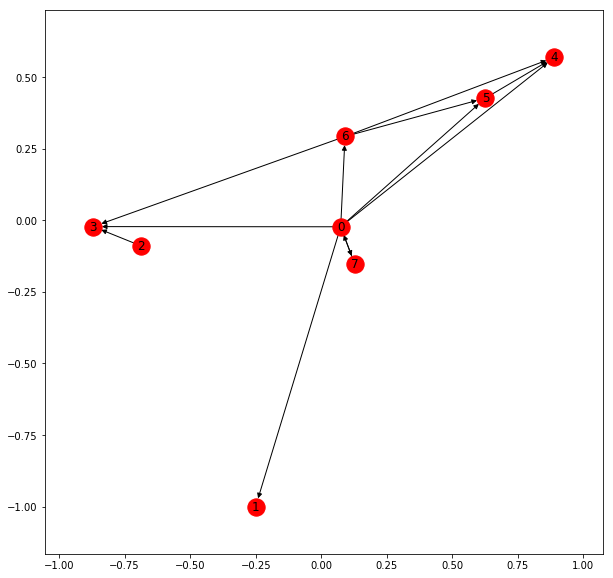

In [138]:
plt.figure(figsize=(10,10))
nx.draw_networkx(D)

### Matrix - berücksichtigt eingehende und ausgehende Kanten:

In [302]:
A = np.matrix([
    [0,1,0,0.333,0.333,0.5,1,1],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0.333,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0.333,0.333,0.5,0,0],
    [1,0,0,0,0,0,0,0]
])

In [293]:
import pandas as pd

In [294]:
cols = ["0", "1", "2", "3", "4", "5", "6", "7"]

In [303]:
df_1 = pd.DataFrame(A, index=cols)
df_1

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.333,0.333,0.5,1.0,1.0
1,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.333,0.000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.333,0.333,0.5,0.0,0.0
7,1.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0


In [266]:
print(compute_rank(A, i=5)[0])

[[1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000],
 [4.1660,0.0000,0.3330,0.0000,0.0000,0.0000,1.1660,1.0000],
 [2.1660,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1660],
 [4.1660,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1660],
 [2.1660,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1660],
 [4.1660,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1660],
 [2.1660,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1660]]


### Matrix - Dangling Node

In [304]:
Adang = np.matrix([
    [0,1,0.125,0.333,0.333,0.5,1,1],
    [0,0,0.125,0,0,0,0,0],
    [0,0,0.125,0.333,0,0,0,0],
    [0,0,0.125,0,0,0,0,0],
    [0,0,0.125,0,0,0,0,0],
    [0,0,0.125,0,0,0,0,0],
    [0,0,0.125,0.333,0.333,0.5,0,0],
    [1,0,0.125,0,0,0,0,0]
])

In [307]:
df_2 = pd.DataFrame(Adang, index=cols)
df_2

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.125,0.333,0.333,0.5,1.0,1.0
1,0.0,0.0,0.125,0.000,0.000,0.0,0.0,0.0
2,0.0,0.0,0.125,0.333,0.000,0.0,0.0,0.0
3,0.0,0.0,0.125,0.000,0.000,0.0,0.0,0.0
4,0.0,0.0,0.125,0.000,0.000,0.0,0.0,0.0
5,0.0,0.0,0.125,0.000,0.000,0.0,0.0,0.0
6,0.0,0.0,0.125,0.333,0.333,0.5,0.0,0.0
7,1.0,0.0,0.125,0.000,0.000,0.0,0.0,0.0


In [309]:
print(compute_rank(Adang, i=9)[0])

PageRank result:
[[1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000],
 [4.2910,0.1250,0.4580,0.1250,0.1250,0.1250,1.2910,1.1250],
 [2.7440,0.0573,0.0989,0.0573,0.0573,0.0573,0.2030,4.3483],
 [4.6876,0.0124,0.0314,0.0124,0.0124,0.0124,0.0791,2.7564],
 [2.8662,0.0039,0.0080,0.0039,0.0039,0.0039,0.0183,4.6915],
 [4.7194,0.0010,0.0023,0.0010,0.0010,0.0010,0.0056,2.8672],
 [2.8752,0.0003,0.0006,0.0003,0.0003,0.0003,0.0015,4.7197],
 [4.7218,0.0001,0.0002,0.0001,0.0001,0.0001,0.0004,2.8753],
 [2.8759,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,4.7219],
 [4.7220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.8759],
 [2.8760,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7220]]


### Damping factor

In [358]:
rank = compute_rank(Adang, da=True, i = 330)

In [343]:
print("Matrix with d:")
print(rank[0])

Matrix with d:
[[0.01875 0.86875 0.125   0.3018  0.3018  0.44375 0.86875 0.86875]
 [0.01875 0.01875 0.125   0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.125   0.3018  0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.125   0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.125   0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.125   0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.125   0.3018  0.3018  0.44375 0.01875 0.01875]
 [0.86875 0.01875 0.125   0.01875 0.01875 0.01875 0.01875 0.01875]]


In [350]:
df_3 = pd.DataFrame(rank[0], index=cols)
df_3

,0,1,2,3,4,5,6,7
0,0.01875,0.86875,0.125,0.30180,0.30180,0.44375,0.86875,0.86875
1,0.01875,0.01875,0.125,0.01875,0.01875,0.01875,0.01875,0.01875
2,0.01875,0.01875,0.125,0.30180,0.01875,0.01875,0.01875,0.01875
3,0.01875,0.01875,0.125,0.01875,0.01875,0.01875,0.01875,0.01875
4,0.01875,0.01875,0.125,0.01875,0.01875,0.01875,0.01875,0.01875
5,0.01875,0.01875,0.125,0.01875,0.01875,0.01875,0.01875,0.01875
6,0.01875,0.01875,0.125,0.30180,0.30180,0.44375,0.01875,0.01875
7,0.86875,0.01875,0.125,0.01875,0.01875,0.01875,0.01875,0.01875


In [359]:
print("Iterations:")
print(rank[1])

Iterations:
[[1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000],
 [3.7974,0.2563,0.5393,...,0.2563,1.2474,1.1063],
 [2.6743,0.2020,0.2745,...,0.2020,0.4559,3.4297],
 ...,
 [0.4366,0.0216,0.0278,...,0.0216,0.0432,0.3950],
 [0.4339,0.0215,0.0276,...,0.0215,0.0429,0.3926],
 [0.4312,0.0214,0.0275,...,0.0214,0.0427,0.3901]]


In [360]:
print("PageRank vector:")
print(np.array2string(np.array(rank[2]), separator=",", formatter={'float_kind':lambda x: "%.4f" % x}))

PageRank vector:
[0.4312,0.0214,0.0275,0.0214,0.0214,0.0214,0.0427,0.3901]
